In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [2]:
# Population Statistics
def create_population(num_people, positive_fraction):
    
    assert positive_fraction <= 1 and positive_fraction >=0 
    return [1 if np.random.random() <= positive_fraction else 0 for i in range(num_people)]

def error(true, pred):
    return abs(true - pred)

Text(0.5, 1.0, 'Different values of p to ensure privacy')

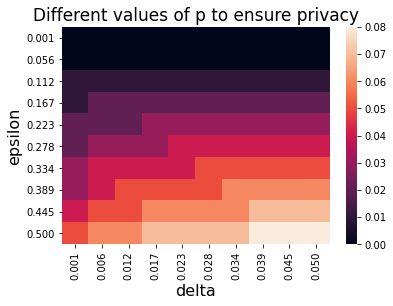

In [3]:
# How does p change with epsilon and delta: 
n = 10**2
true = 0.3
population = create_population(n, true)

n = len(population)
epsilons = np.linspace(0.001, 0.5, 10)
deltas = np.linspace(0.001, 0.05, 10)
X = np.zeros((len(epsilons), len(deltas)))
for i, ep in enumerate(epsilons):
    for j, delta in enumerate(deltas):   
        tau = 3 + np.log(1/delta)
        X[i,j] = int(np.floor(ep*n/tau))/n

p_dependence = pd.DataFrame(X, 
                            index=["{0:.3f}".format(i) for i in epsilons], 
                            columns=["{0:.3f}".format(i) for i in deltas]
                           )        
# Additive mechanisms need a lot of 
ax = sns.heatmap(p_dependence, annot=False)
ax.set_ylabel('epsilon', fontsize=16)
ax.set_xlabel('delta', fontsize=16)
ax.set_title('Different values of p to ensure privacy', fontsize=17)

In [4]:
def sampling(population, epsilon, delta, debug=False):
    
    answer = []
    n = len(population)
    tau = 3 + np.log(1/delta)
    m = int(np.floor(epsilon*n/tau))
    if m <= 0 or m >=n:
        return -1
    
    p = m/n
    if debug:
        print("true fraction: {}".format(sum(population)/n))
        print("n: {} m: {} tau:{} ({}) p:{}".format(n, m, tau, tau/n, p))

    num_to_sample = np.random.binomial(n, p)
    if debug:
        print('Number of samples ', num_to_sample)
        
    answer = np.random.choice(population, size=num_to_sample)
    
    if debug:
        print('Pre-thresholding: {}'.format(sum(answer)/len(answer)))
    if sum(answer) < tau:
        return 0
    else:
        if debug:
            print('ERROR', error(sum(population)/n, sum(answer)/len(answer)))
        return sum(answer)/len(answer)

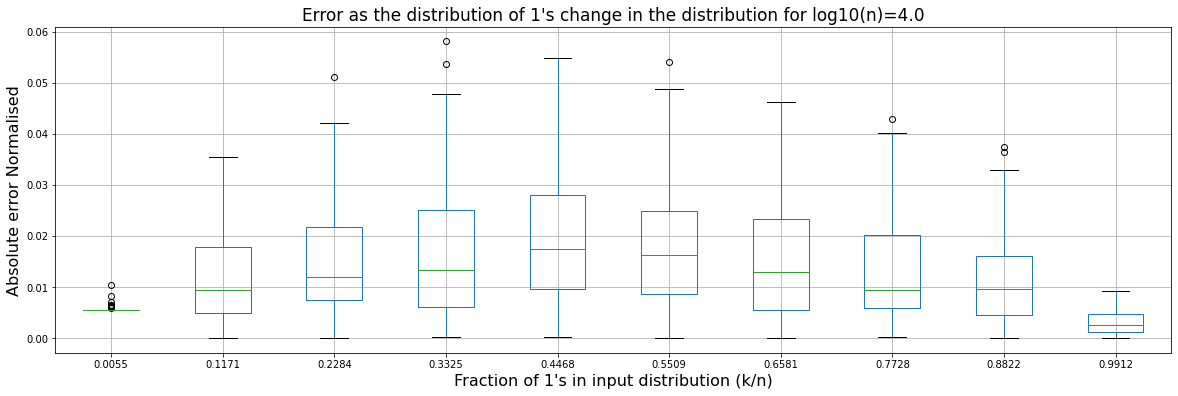

In [34]:
# Independence with distribution of 1's
epsilon = 0.3 # 
delta = 0.05 # Bad things happening
n = 10**4
EPOCHS = 100
ans = defaultdict(list)

trues = np.linspace(0.005, 0.99, 10)
for i, _true in enumerate(trues):
#     sys.stdout.write("\r")
#     sys.stdout.write("{}/{}".format(i+1, len(trues)))
    population = create_population(n, _true)
    true = sum(population)/n
    for epoch in range(EPOCHS):
        pred = sampling(population, epsilon, delta, debug=False)
        ans[true].append(error(true, pred))

ax = pd.DataFrame(ans).boxplot(figsize=(20,6))
# for x in ans:
#     ans[x] = np.mean(ans[x])

# ax = pd.Series(ans).plot(figsize=(20,6), fontsize=14, style='.-')
ax.set_ylabel('Absolute error Normalised', fontsize=16)
ax.set_xlabel("Fraction of 1's in input distribution (k/n)", fontsize=16)
ax.set_title("Error as the distribution of 1's change in the distribution for log10(n)={}".format(np.log10(n)), fontsize=17);
# ax.set_yscale('log')

In [36]:
def sample(population, p):
    
    arr = []
    for val in population:
        if np.random.random() <= p:
            arr.append(val)
            
    if len(arr) == 0:
        return -1
    return np.sum(arr)/len(arr)
            
    
            

In [45]:
n = 10**4
_true = 0.3
population = create_population(n, _true)
true = sum(population)/n



In [46]:
epsilon = 0.3 # 
delta = 0.05 # Bad things happening

EPOCHS = 100
answer_dict = defaultdict(list)
for p in np.linspace(0.001, 0.5, 50):
    for epoch in range(EPOCHS):
        temp = sample(population, p)
        if temp == -1:            
            answer_dict[p].append(1)
        else:
            answer_dict[p].append(abs(temp - true))
        


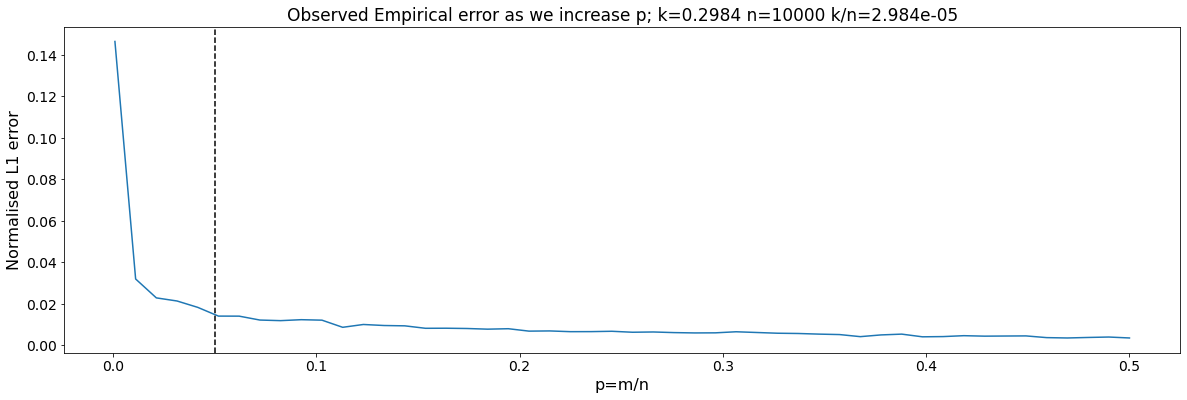

In [47]:
df = pd.DataFrame(answer_dict)
ax = df.mean(axis=0).plot(figsize=(20,6), fontsize=14)
ax.set_ylabel('Normalised L1 error', fontsize=16)
ax.set_xlabel('p=m/n', fontsize=16)
ax.set_title('Observed Empirical error as we increase p; k={} n={} k/n={}'.format(true*n, n, true), fontsize=17)

tau = 3 + np.log(1/delta)
m = int(np.floor(epsilon*n/tau))
assert m >= 0 and m <=n
p_max = m/n
print(p_max)
ax.axvline(p_max, color='k', linestyle='--')

0.05


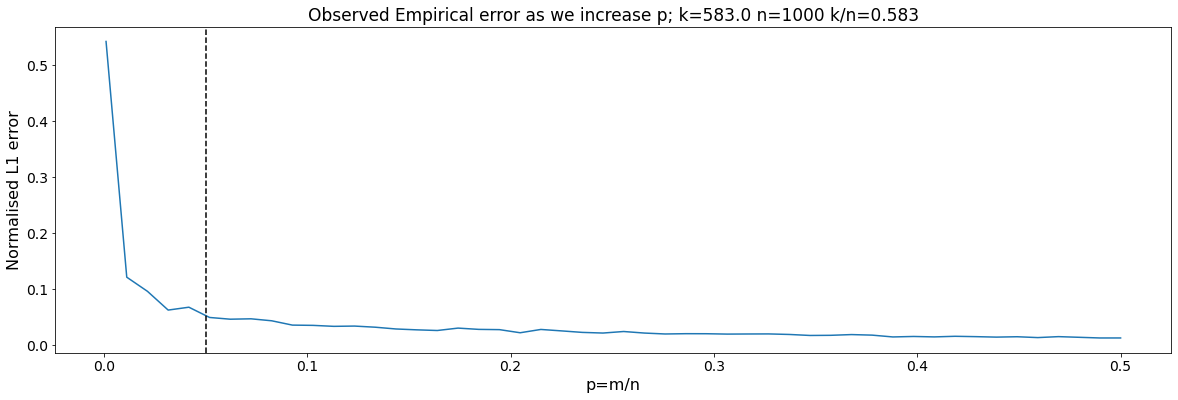

In [52]:
n = 10**3
_true = 0.6
population = create_population(n, _true)
true = sum(population)/n


epsilon = 0.3 # 
delta = 0.05 # Bad things happening

EPOCHS = 100
answer_dict = defaultdict(list)
for p in np.linspace(0.001, 0.5, 50):
    for epoch in range(EPOCHS):
        temp = sample(population, p)
        if temp == -1:            
            answer_dict[p].append(1)
        else:
            answer_dict[p].append(abs(temp - true))
        
df = pd.DataFrame(answer_dict)
ax = df.mean(axis=0).plot(figsize=(20,6), fontsize=14)
ax.set_ylabel('Normalised L1 error', fontsize=16)
ax.set_xlabel('p=m/n', fontsize=16)
ax.set_title('Observed Empirical error as we increase p; k={} n={} k/n={}'.format(true*n, n, true), fontsize=17)

tau = 3 + np.log(1/delta)
m = int(np.floor(epsilon*n/tau))
assert m >= 0 and m <=n
p_max = m/n
print(p_max)
ax.axvline(p_max, color='k', linestyle='--')

0.05


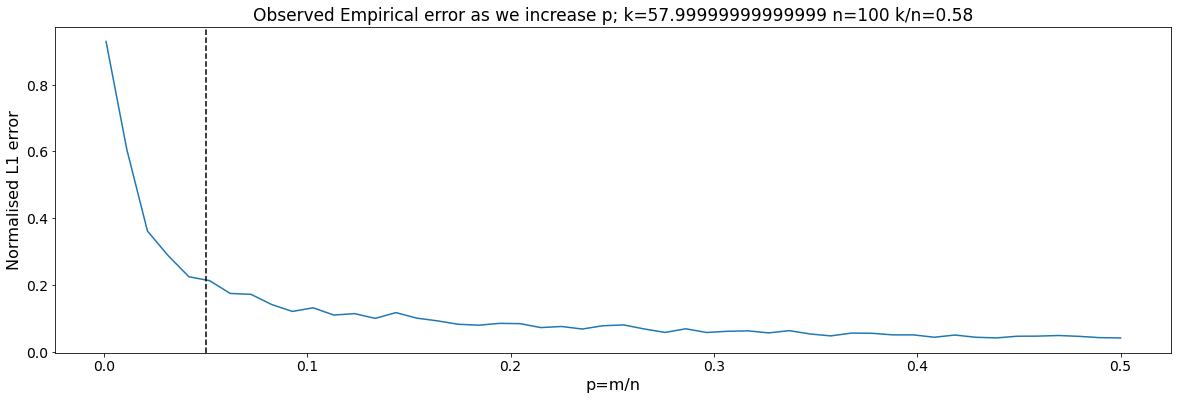

In [51]:
n = 10**2
_true = 0.6
population = create_population(n, _true)
true = sum(population)/n


epsilon = 0.3 # 
delta = 0.05 # Bad things happening

EPOCHS = 100
answer_dict = defaultdict(list)
for p in np.linspace(0.001, 0.5, 50):
    for epoch in range(EPOCHS):
        temp = sample(population, p)
        if temp == -1:            
            answer_dict[p].append(1)
        else:
            answer_dict[p].append(abs(temp - true))
        
df = pd.DataFrame(answer_dict)
ax = df.mean(axis=0).plot(figsize=(20,6), fontsize=14)
ax.set_ylabel('Normalised L1 error', fontsize=16)
ax.set_xlabel('p=m/n', fontsize=16)
ax.set_title('Observed Empirical error as we increase p; k={} n={} k/n={}'.format(true*n, n, true), fontsize=17)

tau = 3 + np.log(1/delta)
m = int(np.floor(epsilon*n/tau))
assert m >= 0 and m <=n
p_max = m/n
print(p_max)
ax.axvline(p_max, color='k', linestyle='--')

In [53]:
import networkx


In [74]:
n = 10**3
epsilon = 0.3 # 
delta = 0.05 # Bad things happening

EPOCHS = 5
answer_dict = defaultdict(list)
for p in np.linspace(0.001, 0.5, 5):
    for epoch in range(EPOCHS):
            G = networkx.binomial_graph(n, p, seed=1234, directed=False)
            if networkx.is_connected(G):
                answer_dict[p].append(1)
            else:
                answer_dict[p].append(0)




0.05


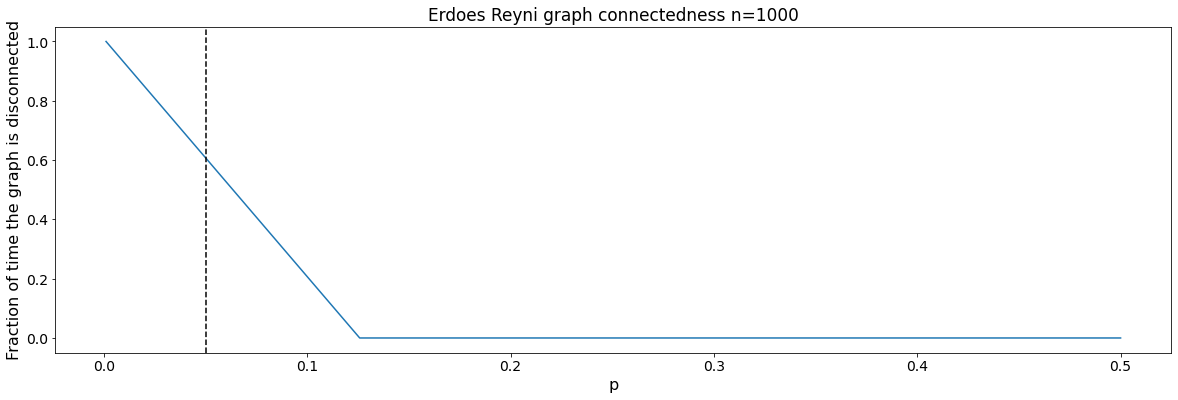

In [76]:
df = pd.DataFrame(answer_dict)
ax = (1 - df.mean(axis=0)).plot(figsize=(20,6), fontsize=14)
ax.set_ylabel('Fraction of time the graph is disconnected', fontsize=16)
ax.set_xlabel('p', fontsize=16)
ax.set_title('Erdoes Reyni graph connectedness n={}'.format(n), fontsize=17)
tau = 3 + np.log(1/delta)
m = int(np.floor(epsilon*n/tau))
assert m >= 0 and m <=n
p_max = m/n
print(p_max)
ax.axvline(p_max, color='k', linestyle='--')

In [77]:
epsilon = 0.3 # 
delta = 0.05 # Bad things happening
n = 10**4
tau = 3 + np.log(1/delta)
m = int(np.floor(epsilon*n/tau))
assert m >= 0 and m <=n
p_max = m/n
print(p_max)

0.05
